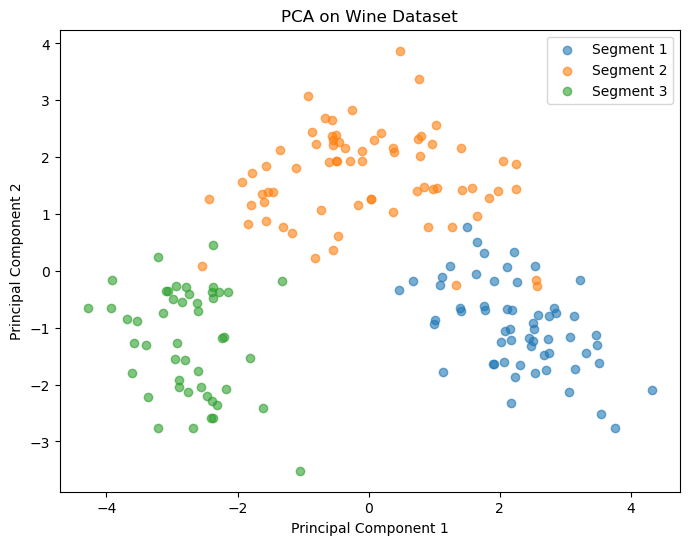

Explained variance ratio: [0.36198848 0.1920749 ]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
url = "https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv"
data = pd.read_csv(url)

# Separate features and target
X = data.drop("Customer_Segment", axis=1)  # features
y = data["Customer_Segment"]               # target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Create dataframe with principal components
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["Segment"] = y

# Plot
plt.figure(figsize=(8,6))
for segment in pca_df["Segment"].unique():
    plt.scatter(
        pca_df[pca_df["Segment"] == segment]["PC1"],
        pca_df[pca_df["Segment"] == segment]["PC2"],
        label=f"Segment {segment}", alpha=0.6
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Wine Dataset")
plt.legend()
plt.show()

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
